In [1]:
from sdv import load_demo
metadata, tables = load_demo(metadata=True)

In [2]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

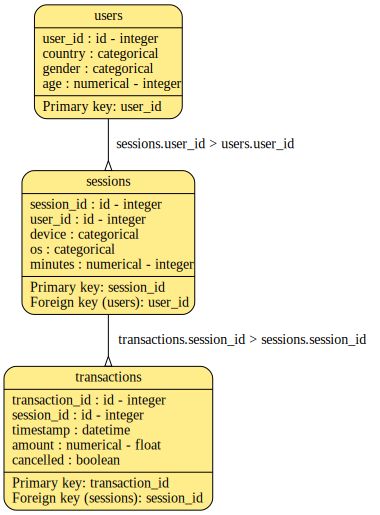

In [3]:
metadata.visualize()

In [4]:
tables

{'users':    user_id country gender  age
 0        0      US      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4      US      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  mobile  android       23
 1           1        1  tablet      ios       12
 2           2        1  tablet  android        8
 3           3        2  mobile  android       13
 4           4        4  mobile      ios        9
 5           5        5  mobile  android       32
 6           6        6  mobile      ios        7
 7           7        6  tablet      ios       21
 8           8        6  mobile      ios       29
 9           9        8  tablet      ios       34,
 'transactions':    transaction_id  session_id           timestamp  amount 

In [5]:
from sdv import SDV
sdv = SDV()
sdv.fit(metadata, tables)

In [6]:
sampled = sdv.sample_all()

In [7]:
sampled

{'users':    user_id country gender  age
 0        0      US      M   30
 1        1      BG    NaN   27
 2        2      BG      M   48
 3        3      ES      M   38
 4        4      UK      M   27
 5        5      US      M   41
 6        6      ES      F   41
 7        7      BG      M   54
 8        8      ES    NaN   42
 9        9      BG      F   51,
 'sessions':     session_id  user_id  device       os  minutes
 0            0        0  mobile  android       24
 1            1        2  mobile  android       28
 2            2        2  mobile  android       34
 3            3        2  tablet  android       19
 4            4        5  mobile  android       17
 5            5        6  mobile      ios       10
 6            6        6  tablet      ios       10
 7            7        7  mobile      ios       21
 8            8        7  tablet  android       23
 9            9        7  mobile  android       14
 10          10        9  mobile      ios       19
 11          1

In [11]:
sdv.save("sdv_quickstart.pkl")

In [13]:
sdv = SDV.load('sdv_quickstart.pkl')

In [14]:
sampled = sdv.sample_all(5)

In [15]:
sampled

{'users':    user_id country gender  age
 0       10      DE      F   28
 1       11      UK      M   23
 2       12      UK    NaN   47
 3       13      US      M   22
 4       14      US      F   22,
 'sessions':    session_id  user_id  device       os  minutes
 0          13       11  mobile  android       22
 1          14       12  mobile      ios       10
 2          15       13  tablet  android       30
 3          16       14  tablet  android       25
 4          17       14  tablet  android       24,
 'transactions':    transaction_id  session_id           timestamp  amount  cancelled
 0              15          13 2019-01-03 21:23:11   100.5      False
 1              16          13 2019-01-03 20:50:27    89.6      False
 2              17          14 2019-01-01 12:41:38    86.8       True
 3              18          15 2019-01-16 15:03:10    71.5      False
 4              19          17 2019-01-24 07:53:46   112.4      False}